In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [12]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olinda
Processing Record 2 of Set 1 | alta floresta
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | ossora
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | krasnoselkup
City not found. Skipping...
Processing Record 10 of Set 1 | obo
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | swan hill
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | piacabucu
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | catuday
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | touros
Processing Record 22 

Processing Record 37 of Set 4 | adrar
Processing Record 38 of Set 4 | souillac
Processing Record 39 of Set 4 | komsomolskiy
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | aquiraz
Processing Record 42 of Set 4 | noshiro
Processing Record 43 of Set 4 | shaoyang
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | port hedland
Processing Record 46 of Set 4 | ginda
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | raudeberg
Processing Record 49 of Set 4 | avarua
Processing Record 0 of Set 5 | bambanglipuro
Processing Record 1 of Set 5 | amvrosiyivka
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | asau
City not found. Skipping...
Processing Record 4 of Set 5 | portage
Processing Record 5 of Set 5 | ranong
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Set 5 | taos
Processing Record 8 of Set 5 | kichera
Processing Record 9 of Set 5 | maniitsoq
Processing Record 10 of Set 5 | kata

Processing Record 27 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 28 of Set 8 | lakeway
Processing Record 29 of Set 8 | kodiak
Processing Record 30 of Set 8 | caravelas
Processing Record 31 of Set 8 | christchurch
Processing Record 32 of Set 8 | broome
Processing Record 33 of Set 8 | matagami
Processing Record 34 of Set 8 | ngorongoro
Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | treinta y tres
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | ust-kan
Processing Record 39 of Set 8 | sola
Processing Record 40 of Set 8 | airai
Processing Record 41 of Set 8 | acarau
City not found. Skipping...
Processing Record 42 of Set 8 | cockburn town
Processing Record 43 of Set 8 | galbshtadt
Processing Record 44 of Set 8 | bakchar
Processing Record 45 of Set 8 | tanabe
Processing Record 46 of Set 8 | roshal
Processing Record 47 of Set 8 | ixtapa
Processing Record 48 of Set 8 | kysyl-syr
Processing Record 49 of Set 8 |

Processing Record 14 of Set 12 | aldan
Processing Record 15 of Set 12 | kovdor
Processing Record 16 of Set 12 | kalawit
Processing Record 17 of Set 12 | erenhot
Processing Record 18 of Set 12 | nhulunbuy
Processing Record 19 of Set 12 | santa fe
Processing Record 20 of Set 12 | bosaso
Processing Record 21 of Set 12 | rafai
Processing Record 22 of Set 12 | ozernovskiy
Processing Record 23 of Set 12 | odweyne
City not found. Skipping...
Processing Record 24 of Set 12 | bani walid
Processing Record 25 of Set 12 | concepcion del uruguay
Processing Record 26 of Set 12 | aranos
Processing Record 27 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 28 of Set 12 | liwale
Processing Record 29 of Set 12 | srednekolymsk
Processing Record 30 of Set 12 | yazman
Processing Record 31 of Set 12 | namanga
Processing Record 32 of Set 12 | chinchani
Processing Record 33 of Set 12 | dryden
Processing Record 34 of Set 12 | havre-saint-pierre
Processing Record 35 of Set 12 | nguiu
City not

In [13]:
city_data_pd = pd.DataFrame(city_data)
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
city_data_pd.to_csv(output_data_file, index_label="City_ID")
city_data_pd.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [14]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,olinda,90,EC,1547611200,83,-2.03,-79.75,78.80,2.24
1,alta floresta,56,BR,1547613569,97,-9.87,-56.08,72.72,1.95
2,port lincoln,92,AU,1547613374,75,-34.72,135.86,73.17,14.14
3,ossora,0,RU,1547613830,100,59.24,163.07,-17.28,9.44
4,kapaa,1,US,1547610960,61,22.08,-159.32,77.00,11.41


## Latitude vs Temperature Plot

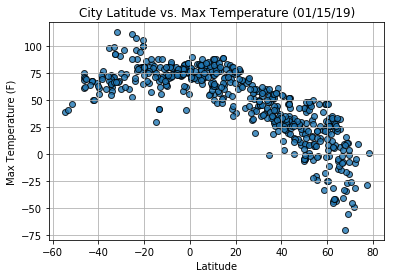

In [15]:
plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/temp.png")
plt.show()

## Latitude vs. Humidity Plot

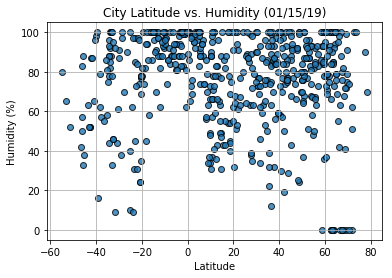

In [16]:
plt.scatter(lats,humidity,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

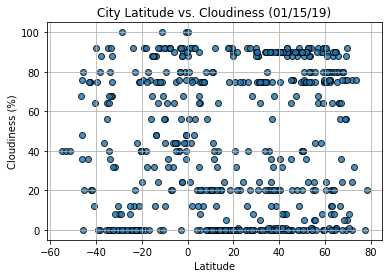

In [17]:
plt.scatter(lats,cloudiness,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

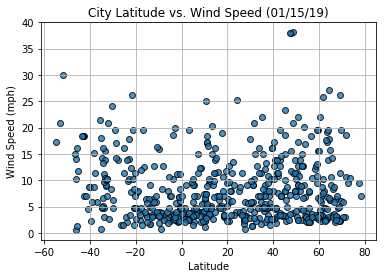

In [18]:
plt.scatter(lats,wind_speed,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/wind.png")
plt.show()